In [1]:
!pip install -U torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
# From: https://huggingface.co/docs/diffusers/en/conceptual/evaluation

import torch
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")

def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

In [3]:
import pandas as pd
import numpy as np
from PIL import Image

df = pd.read_csv('input.csv')

for index, row in df.iterrows():
    try:
        # Load the image corresponding to the row's "image_file" column
        image_path = row['image_file']
        image = Image.open(image_path)
        np_image = np.array(image)
        images = np_image[np.newaxis, ...]

        # Set the prompt from the row's "prompt" column
        prompts = [row['prompt']]

        # Calculate the CLIP score
        clip_score = calculate_clip_score(images, prompts)

        # Update the "CLIP_score" in the DataFrame
        df.at[index, 'CLIP_score'] = clip_score
    except FileNotFoundError:
        print(f"File not found: {image_path}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Save the updated DataFrame
df.to_csv('data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

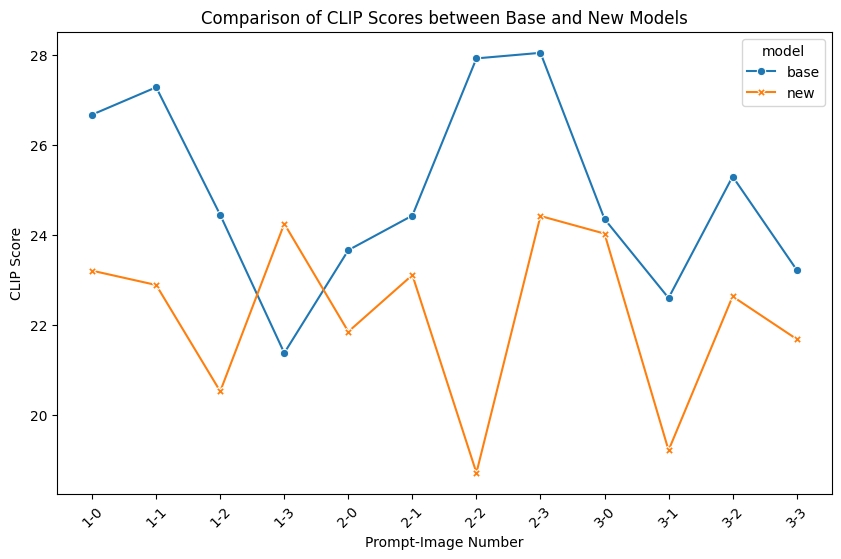

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

# Create new column for the X-axis combining prompt_num and image_num
data['prompt_image'] = data['prompt_num'].astype(str) + '-' + data['image_num'].astype(str)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='prompt_image', y='CLIP_score', hue='model', style='model', markers=True, dashes=False)

# Enhance plot
plt.title('Comparison of CLIP Scores between Base and New Models')
plt.xlabel('Prompt-Image Number')
plt.ylabel('CLIP Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

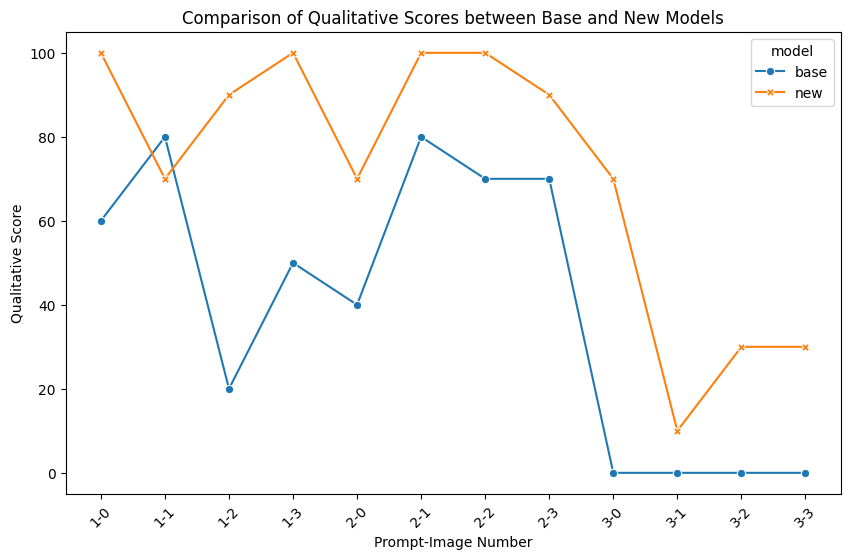

In [6]:
# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='prompt_image', y='qual_score', hue='model', style='model', markers=True, dashes=False)

# Enhance plot
plt.title('Comparison of Qualitative Scores between Base and New Models')
plt.xlabel('Prompt-Image Number')
plt.ylabel('Qualitative Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()